

# Project: No-shows Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I will be exploring the dataset for doctor's appointments in Brazil provided by Kaggle. This dataset provides certain characteristics for doctor's appointments made in Brazil, such as the day the appointment was made for, whether or not the person has hypertension and/or diabetes, etc. I am planning on using Python, numpy, matplotlib, and pandas to explore questions such as:


1. Are there certain variables that seem to affect no-shows more than others?  
    -Does age have any effect on no shows?
    
    -Do no shows happen more often on certain days of the week?  
   
   -Do people with hypertension and/or diabetes account for more  or less no-shows to appointments than others?
 
 




In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline





<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [132]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
no_show = pd.read_csv('./noshowappointments.csv')
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No




### Data Cleaning

In [133]:
# First, I should check if there are any null entries in my DataFrame

In [134]:
no_show.info()
# This cell tells me that it doesn't look like there are any nulls I have to worry about

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [135]:
no_show.describe()
# This gives me a preliminary look at my data.

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [136]:
no_show.isnull().values.any()
# This cell confirms that there are no null entries.

False

In [137]:
# For the question of whether or not age has anything to do with no-shows, I need to check if there's any ages that seem off.
# Right away, from no_show.describe(), I see that the minimum age is -1. That seems like a mistake, so I am going to check it out.
# Age of less than 0 doesn't really make sense.

In [138]:
no_show[no_show['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [139]:
# It seems that there is only one entry with an age of -1. It seems safe to assume this was some sort of mistake, so we should
# probably just take the dataframe without this row.

In [140]:
no_show = no_show[no_show['Age'] >=0]
# This gets rid of our problematic row.

In [141]:
# Let's check to make sure only one row was removed.

In [142]:
no_show.info()
# This cell confirms one row was removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [143]:
no_show[no_show['Age'] < 0]
# Since this cell doesn't output any rows, there are no more age entries less than 0. We can move forward.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [144]:
# For the question of whether or not no shows happen more often on certain days of the week, I will need to make sure I convert 
# the AppointmentDay column into a column with date time objects.

In [145]:
no_show['My_Col'] = pd.to_datetime(no_show['AppointmentDay'],format='%Y-%m-%d')
no_show['AppointmentDay'] = no_show['My_Col']
#Converted appointment day column to date time object, so that a day can be extracted from each appointment day.

In [146]:
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,My_Col
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29


In [147]:
del no_show['My_Col']
# Removed extra column

In [148]:
no_show['weekday'] = pd.to_datetime(no_show['AppointmentDay']).apply(lambda x: x.weekday())

# Extracted day from AppointmentDay column for each entry as integer

In [149]:
import calendar
no_show['weekday'] = no_show['weekday'].apply(lambda x: calendar.day_abbr[x])
# Changed the integer for day to the day's name.

In [150]:
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,weekday
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Fri
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Fri
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Fri
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Fri
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Fri


In [151]:
# That looks good. Now, for my question of whether or not the presence of hypertension and/or diabetes has an effect
# on no shows, I will need to make sure that there are no rows with the hypertension column not equal to a 0 or 1.
# I will repeat that for the diabetes column. 

In [152]:
# First, check if there's any problems with the hypertension and diabetes entries.
no_show[(no_show['Hipertension']!=1) & (no_show['Hipertension'] != 0)]

#Because this cell doesn't output any rows, we can assume the entries for the hypertension characteristic is fine.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,weekday


In [153]:
no_show[(no_show['Diabetes']!=1) & (no_show['Diabetes'] != 0)]
# Similarly, the entries for the diabetes characteristic seem to be good. Now, we can continue.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,weekday


<a id='eda'></a>
## Exploratory Data Analysis


### Question: Is there a relationship between age and no shows?

In [154]:
no_show['Age'].describe()
# Summary statistics for our dataframe, based on the age variable.

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [155]:
# First, we can examine a histogram of the distribution of ages throughout our entire Dataframe.

Text(0.5,1,'Ages of Everyone who made an Appointment')

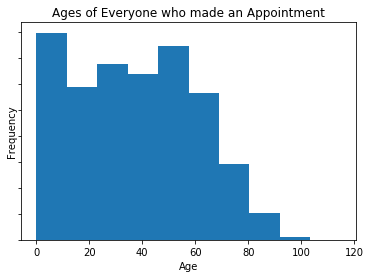

In [156]:

ax0=no_show['Age'].plot(kind='hist')
ax0.tick_params(labelleft='off')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Ages of Everyone who made an Appointment')

In [157]:
#  Our plot seems to show a skewed right distribution.

In [158]:
# Now, we want to look at the age distribution for no shows.

In [159]:
no_show_age = no_show[no_show['No-show'] == 'Yes'] 
# Gets us the rows of our dataframe for which no show was marked yes, IE the person did not show up

In [160]:
no_show_age['Age'].describe()
# Summary statistics for age of people who did not show up to their appointments. Right away, it seems like 
# The mean age and the median are a little lower. Could it be possible that younger people miss their appointments more often?

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

Text(0.5,1,'Ages of Everyone who made an Appointment')

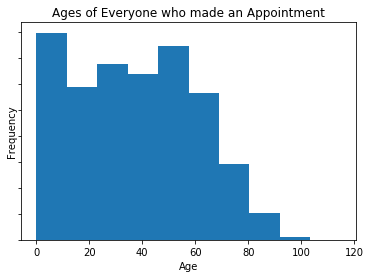

In [161]:
ax0=no_show['Age'].plot(kind='hist')
ax0.tick_params(labelleft='off')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Ages of Everyone who made an Appointment')
# Re entering this so we can see both plots close together.

Text(0.5,1,'No Show Ages')

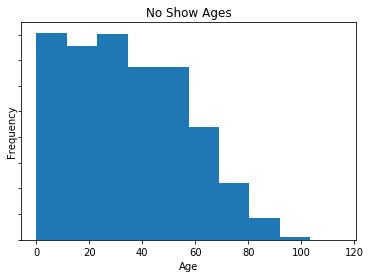

In [162]:
ax00 = no_show_age['Age'].plot(kind='hist')
ax00.tick_params(labelleft='off')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('No Show Ages')

In [163]:
# This doesn't look different enough from our first histogram for us to make any good observations. We could try a boxplot instead.

Text(0.5,1,'Ages of Everyone who Made an Appointment')

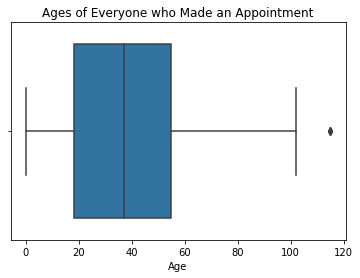

In [164]:

sns.boxplot(no_show['Age'])
plt.title('Ages of Everyone who Made an Appointment')
#Boxplot for ages of everyone who made an appointment

Text(0.5,1,'No Show Ages')

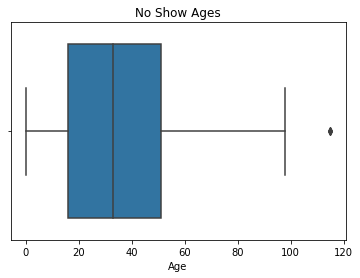

In [165]:
sns.boxplot(no_show_age['Age'])
plt.title('No Show Ages')

Though the median and mean age are somewhat lower for the no shows, both of our plots imply that there isn't a significant difference between the ages of people who did not show up their appointments versus the ages of everyone who made an appointment

### Question: Do no shows happen more often on certain days of the week? 

In [166]:
#  For each day, count the number of no shows, and divide by the number of appointments made for that day. 
# However, we do know that doctor's offices are usually closed on Sundays. Let's explore the data based on that.


In [167]:
Sun = no_show[(no_show['No-show']=='Yes') & (no_show['weekday'] == 'Sun')]
Sun.shape[0]
#This tells us either no one did a no show on Sunday, or the office is closed Sunday. Let's check.

0

In [168]:
Sunday_closed = no_show[(no_show['weekday']== 'Sun')]
Sunday_closed
# It seems that no appointments were made for Sundays, implying the office is closed on Sunday. 
# We can leave Sunday out of our analysis.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,weekday


In [169]:
''' Finds the proportion of the number of rows in one dataframe compared to the number of rows in another. '''
def proportion_no_show(x,y):
    return x.shape[0]/y.shape[0]

In [170]:
# list of days to iterate over
days = ['Mon','Tue','Wed','Thu','Fri','Sat']


In [171]:
# create a list of the proportion of no shows for each day versus the number of appointments made for that day.
proportions = []
for i in days:
    proportions.append(proportion_no_show(no_show[(no_show['No-show']=='Yes') & (no_show['weekday'] == i)],no_show[no_show['weekday'] == i]))

In [172]:
proportions

[0.20648058466144228,
 0.20093603744149766,
 0.19689179263153825,
 0.1935409056647533,
 0.21226142278773857,
 0.23076923076923078]

In [173]:
labels=['M','T','W','Th','F','Sa']
x = [1,2,3,4,5,6]
y = proportions

Text(0.5,1,'Proportion of No-Shows Versus Day')

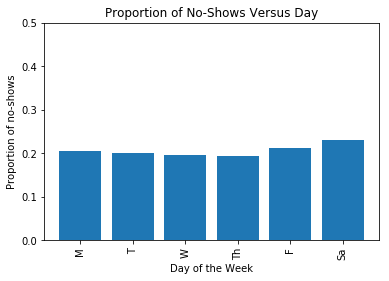

In [174]:
plt.bar(x,y)
plt.xticks(x, labels, rotation='vertical')
plt.ylim((0,0.5))
plt.xlabel('Day of the Week')
plt.ylabel('Proportion of no-shows')
plt.title('Proportion of No-Shows Versus Day')
# A bar chart will show us how no-shows are distributed by day.

It would seem that no-shows happen slightly more on Fridays and Saturdays than they do on the other days of the week. This might imply a slight correlation between no-shows and appointments being made for the weekend (Friday/Saturday). This could be because people would rather go out on the weekend then go to their appointments. Note, this is pure  speculation based on my findings. My findings do not imply that making appointments for Friday or Saturday directly leads to no-shows. They are tentative, and merely show some small correlation.



### Do people with hypertension and/or diabetes account for more  or less no-shows to appointments than others?

In [175]:
# For each case, find the proportion of no shows. 
# I found it a little more difficult to try to do this without repetitive code.

In [176]:
# Hypertension only
hyper_only_no_show = no_show[(no_show['Hipertension']==1) & (no_show['Diabetes'] == 0) & (no_show['No-show'] =='Yes')]
hyper_only_total = no_show[(no_show['Hipertension']==1) & (no_show['Diabetes'] == 0)]
hyper = proportion_no_show(hyper_only_no_show,hyper_only_total)


In [177]:
# Diabetes only
diabetes_only_no_show = no_show[(no_show['Hipertension']==0) & (no_show['Diabetes'] == 1) & (no_show['No-show'] =='Yes')]
diabetes_only_total =  no_show[(no_show['Hipertension']==0) & (no_show['Diabetes'] == 1)]
dia = proportion_no_show(diabetes_only_no_show,diabetes_only_total)


In [178]:
# Both hypertension and diabetes
both_no_show = hyper_only = no_show[(no_show['Hipertension']==1) & (no_show['Diabetes'] == 1) & (no_show['No-show'] =='Yes') ]
both_total= no_show[(no_show['Hipertension']==1) & (no_show['Diabetes'] == 1)]
both = proportion_no_show(both_no_show,both_total)


In [179]:
 other = 1 - (hyper + dia + both)

# This is the proportion of no shows not in any of these cases.

In [180]:
labels_2 = 'Hypertension only','Diabetes only', 'Hypertension and Diabetes', 'Other'
sizes = [100*hyper,100*dia,100*both,100*other]
# Multiply each proportion by 100 so that we can have numbers that add up to 100%.

In [181]:
sizes

[17.179236043095006, 19.83527796842828, 17.59173604687018, 45.39374994160654]

In [182]:
np.sum(sizes)

100.00000000000001

In [183]:
#It seems our sum of proportions is slightly off from 100. Fix this by subtracting .00000000000001 from the size for other.

In [184]:
sizes = [100*hyper,100*dia,100*both,100*other-0.00000000000001]

In [185]:
np.sum(sizes)

100.0

In [186]:
# That looks right.

Text(0.5,1,'No Shows')

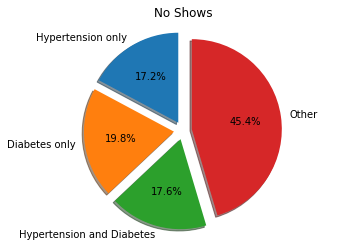

In [187]:
fig1,ax1 = plt.subplots()
ax1.pie(sizes, explode = (0.1, 0.1, 0.1, 0.1), labels=labels_2, shadow=True, autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
plt.title('No Shows')
# A pie chart lets us see how much people with hypertension and/or diabetes account for no shows compared to other no shows.
# It also allows us to see a comparison between the different cases of hypertension only, diabetes only, and both, 
# at the same time.

 From this chart, we can see that people with hypertension and/or diabetes actually account for more than 50% of the no-shows. Also note that there is a higher proportion of no-shows for people with diabetes only compared to people with both hypertension and diabetes, which is a fairly interesting result. I personally would have guessed that people with hypertension and/or diabetes would account for less than 50% of the no-shows, as these seem like important reasons to show up to your doctor's appointments. By the same reasoning, I also would have guessed that having both hypertension AND diabetes implies a person rarely ever misses their appointments. However, a possible explanation for both of these results is that people who have hypertension and/or diabetes have many doctor's appointments, so missing a couple here and there aren't big deals to them. Note, that this is speculation based on tentative findings, and my findings do not imply that having diabetes and/or hypertension leads to no-shows for doctor's appointments.

<a id='conclusions'></a>
## Conclusions

My initial questions were:
1. Does age have any effect on no shows?
2. Do no shows happen more often on certain days of the week?  
3. Do people with hypertension and/or diabetes account for more  or less no-shows to appointments than others?

For the question of if age has any effect on no shows, my plots seem to imply that there wasn't much of a difference between the distributions of ages of people who didn't show up to their appointments versus the ages of everyone who made an appointment. Both my histograms and boxplots implied that. It seems like there is no correlation between younger/older age and missing more doctor appointments.

For the question of whether or not no shows happened more often on certain days of the week, my plot seemed to imply that there was a slightly higher proportion of no shows on Friday and Saturday. I speculate that this is because the weekend makes people more likely to ditch their doctor's appointments in favor of going out, or relaxing at home instead.

For the question of whether or not people with hypertension and/or diabetes account for more or less no-shows to appointments than others, my findings told me that people with hypertension and/or diabetes actually accounted for more than 50% of the no shows. This is an interesting result because I personally would have expected people with those conditions to view their doctor's appointments as more important to go to. However, it is possible that the reason they make up such a huge proportion of no shows is because that group of people have many doctor's appointments, and some are less important than others, so they decide to skip out on them. 

My speculation and findings do not imply causation in any way, but simply some correlation. It is possible that a statistical p-value test for the question of age would have confirmed moreso that age is not a significant factor in whether or not a person shows up to their appointment. Also, in the process of data cleaning, I deleted a row from the table with an age of -1. It is possible that -1 has some sort of special meaning, and was not just a mistake. 

Overall, I can conclude that there might be some small correlation between it being Friday/Saturday, and a person not showing up to their appointment. I can also conclude that people with hypertension and/or diabetes account for a majority of the no shows for appointments. 

